# Polynomial multiplication using FFT

Given  polynomials $a(x)=\sum_{i=0}^n a_i x^i$ and $b(x)=\sum_{i=0}^m b_i x^i$,  the  product $c(x) =a(x)b(x)$ is a polynomial $\sum_{i=0}^{n+m} c_i x^i$ with coefficients $c_i=\sum_{j=0}^i a_j b_{i−j}$.  Implement a function for polynomial multiplication with $O(N log N)$ run-time complexity using FFT (Notes Ex 1.53, Lecture fom Oct 20).

Test it for $a(x) =\sum_{i=0}^{100} x^i$ and $b(x) =\sum_{i=0}^{100} ix^i$.

### Idea: 
Calulate polynomial c by evaluating the polynomials a and b at $x_k$, obtaining $c(x_k) = a(c_k)b(x_k)$ and determining the coefficents of c by polynomial interpolation. 

For numerical stability and efficiency choose $x_k$ to be the roots of 1 on the complex unit-circle.
<img src="https://miro.medium.com/max/875/0*1SM0YAm6epxImWe_.png" alt="Drawing" style="width: 50%;"/>

Then the values of a and b at those points is calculated by:

$$ \omega = e^{\frac{2 \pi i}{2n} } $$
= first 2n-th root on the unit-circle

$$ x_j = \omega^j = e^{\frac{2 \pi ij}{2n} } $$
j-th 2n-th root

$$ a(x_j) = \sum_{k=0}^n a_k e^{-\frac{2 \pi i j k}{n}} = \sum_{k=0}^n a_k \omega^{kj}$$
which is the DFT which in turn can be efficiently (O(n log n)) calculated using FFT.

$$ c(x_k) = a(c_k)b(x_k) $$

Reverse step by inverce FFT:
$$ c_i = FFT^{-1}(c(x_k)) $$

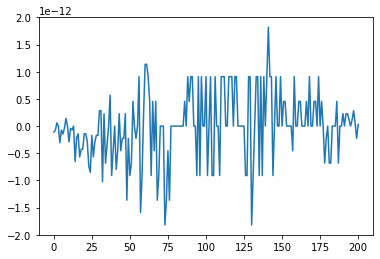

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

def polynomial_product(a, b):
    # find the degree of c
    two_n = a.size - 1 + b.size - 1
    
    # append zeros to the two coefficient vectors a and b in order to get them to the degree 2n
    a = np.append(a, np.zeros(two_n - a.size+1))
    b = np.append(b, np.zeros(two_n - b.size+1))    
    
    # evaluate the polynomials given by the coefficients a_k and b_k on the complex unit circle using the DFT (FFT)
    a_xj = sp.fft.fft(a)
    b_xj = sp.fft.fft(b)
    
    # calculate the values of the c polynomial at x_j by simple multiplication
    c_xj = a_xj*b_xj
    
    # extract the coefficients of c by inverse FT
    c = sp.fft.ifft(c_xj)
    
    return c.real
       

a = np.ones(101)
b = np.arange(101)

own_solution = polynomial_product(a, b)

# comparison
p1 = np.poly1d(a)
p2 = np.poly1d(b)
np_solution = (p1*p2).c
np_solution = np.insert(np_solution, 0, 0)

plt.figure()
plt.plot(own_solution - np_solution)